In [1]:
import ic_sets, auction_data, os
hist_plot = auction_data.hist_plot
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style('white')
%matplotlib inline

In [2]:
tsuchiura_data = auction_data.AuctionData('tests/reference_data/tsuchiura_data.csv')

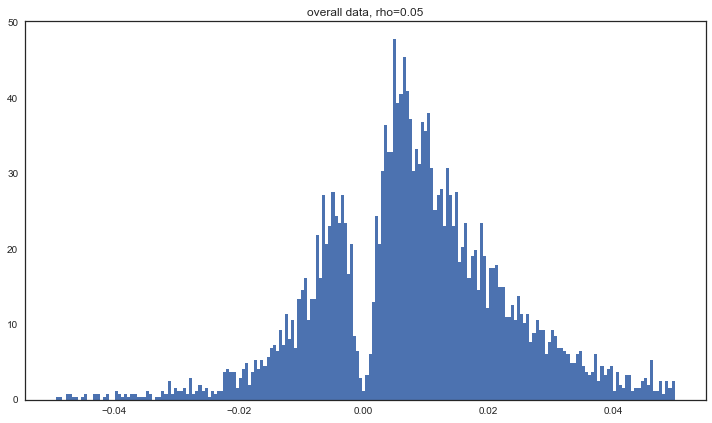

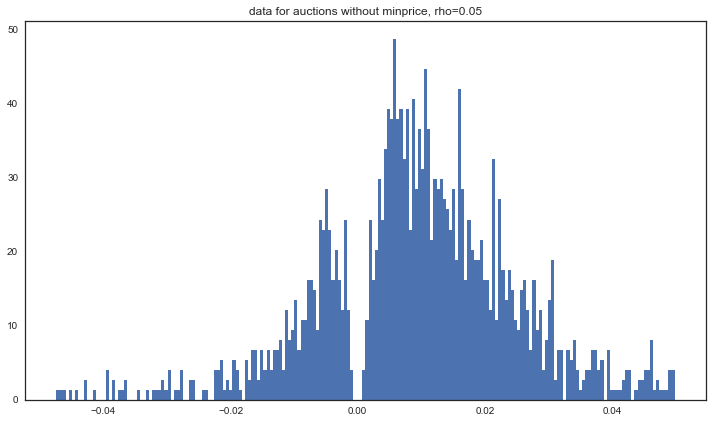

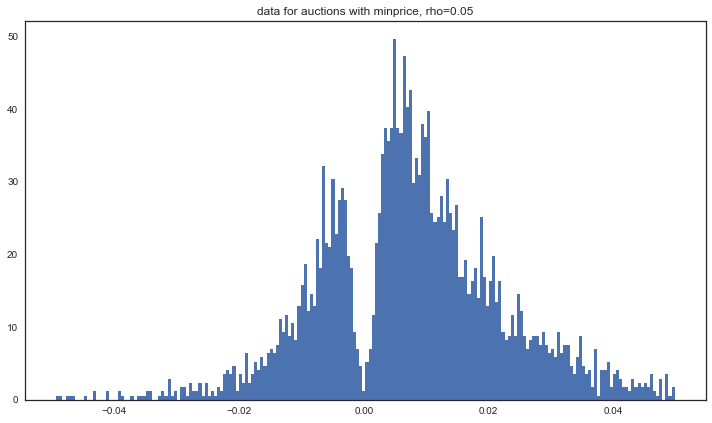

In [3]:
delta = tsuchiura_data.df_bids.norm_bid - tsuchiura_data.df_bids.most_competitive
rho = .05
delta = delta[delta.between(-rho, rho)]
hist_plot(delta,'overall data, rho={}'.format(rho))
hist_plot(delta[tsuchiura_data.df_bids.minprice.isnull()], 
          'data for auctions without minprice, rho={}'.format(rho))
hist_plot(delta[~tsuchiura_data.df_bids.minprice.isnull()], 
          'data for auctions with minprice, rho={}'.format(rho))

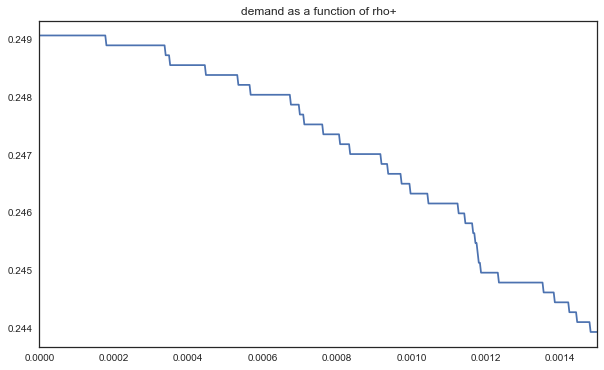

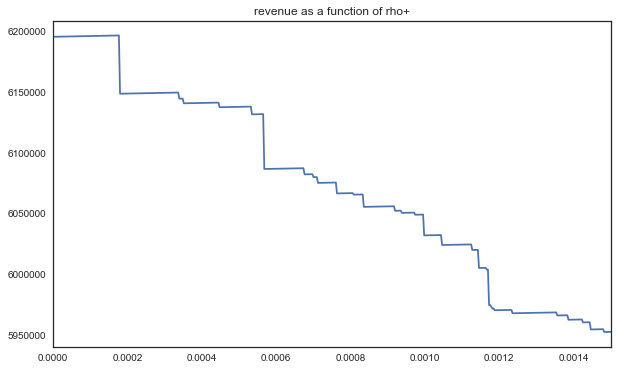

In [4]:
tsuchiura_data.get_counterfactual_demand(.0015,.0).demand.plot(figsize = (10,6))
plt.title('demand as a function of rho+')
plt.show()

tsuchiura_data.get_counterfactual_demand(.0015,.0).revenue.plot(figsize = (10,6))
plt.title('revenue as a function of rho+')
plt.show()

## Test: inference from upper deviation alone as $m$ varies

This should be equivalent to the case where there are no information constraints

## Test: inference from upper and lower deviations as $m$ varies -- i.i.d. case

In [25]:
ic_solver = ic_sets.ICSets(rho_p=.001, rho_m=.005, auction_data=tsuchiura_data, 
                           k=0, t=.0, m=.5)

steps = np.linspace(0, 1, 5)
list_p_c = list(itertools.product(steps, repeat=4))

data = []
index = []

for i, test_pc in enumerate(list_p_c):
    is_rationalizable_iid = ic_solver.is_rationalizable_iid(test_pc)
    is_rationalizable = ic_solver.is_rationalizable(test_pc)
    index.append(i)
    data.append([is_rationalizable, is_rationalizable_iid])

df_match = pd.DataFrame(data=data, index=index, columns=['iid', 'general'])
np.mean(df_match['iid'] == df_match['general'])

1.0

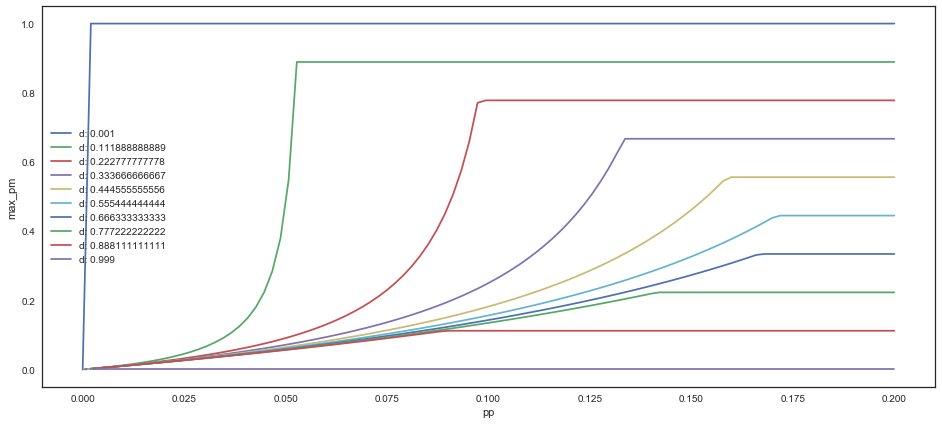

In [20]:
# illustrating value_pm where it is constrained by IC 
legend = []
plt.figure(figsize=(16,7))
for d in np.linspace(0.001, .999, 10):
    range_pp = np.linspace(ic_solver.lower_slope_pp * d, .2, 100)
    max_pm = [ic_solver.value_pm(d, pp) for pp in range_pp]
    plt.plot(range_pp, max_pm)
    legend.append('d: {}'.format(d))
plt.legend(legend)
plt.xlabel('pp')
plt.ylabel('max_pm')

plt.show()

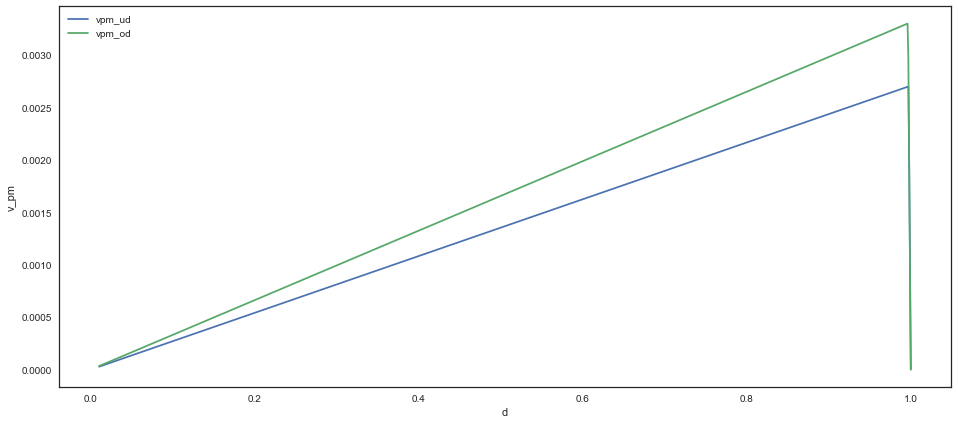

In [21]:
# illustrating that the lowest value of value_pm is attained at u_d

legend = ['vpm_ud', 'vpm_od']
plt.figure(figsize=(16,7))
u_d_val = []
o_d_val = []
d_range = np.linspace(0.01, 1., 1000) 
for d in d_range:
    u_d, o_d = .9 * d, 1.1 * d
    vpm_ud, vpm_od = (ic_solver.value_pm(d, ic_solver.lower_slope_pp * d_) for d_ in [u_d, o_d])
    u_d_val.append(vpm_ud)
    o_d_val.append(vpm_od)
plt.plot(d_range, u_d_val)
plt.plot(d_range, o_d_val)
plt.legend(legend)
plt.xlabel('d')
plt.ylabel('v_pm')

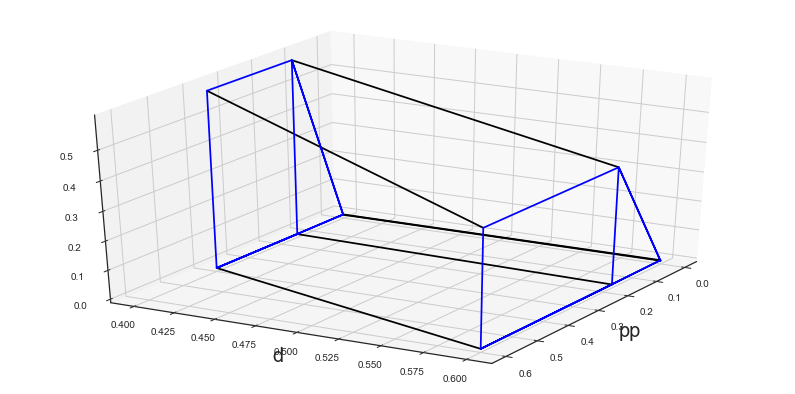

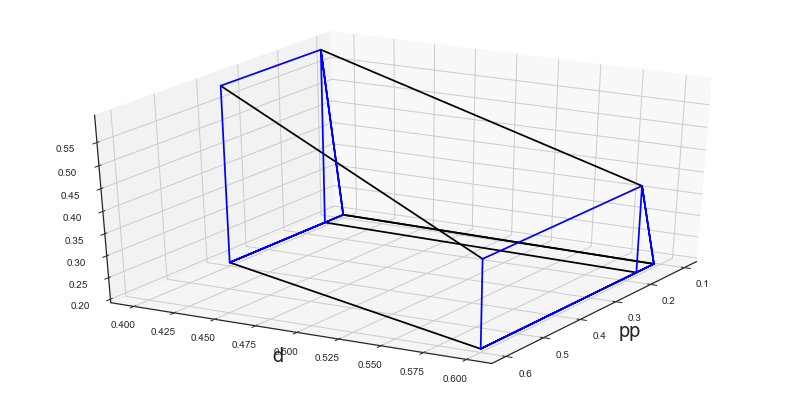

In [22]:
# illustrating plotting tools

ic_solver.plot_z(.4, .6, .0)
ic_solver.plot_z(.4, .6, .2)
plt.show()

(0, 0.1)

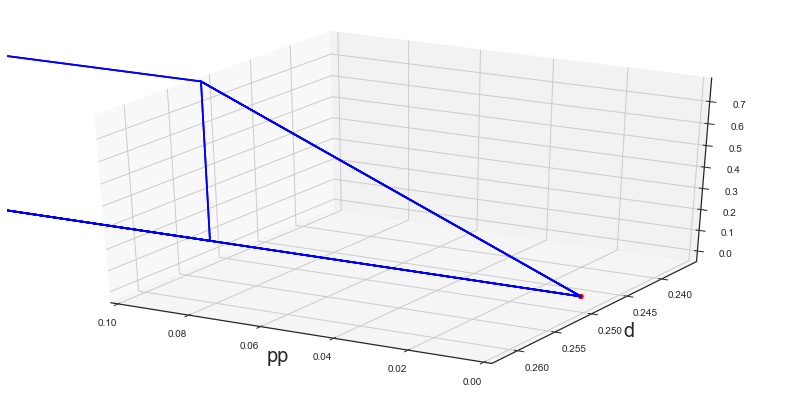

In [24]:
p_c = (1, 1, 1, 1)
ic_solver.is_rationalizable(p_c, 'plot')
plt.xlim(0, .1)

False


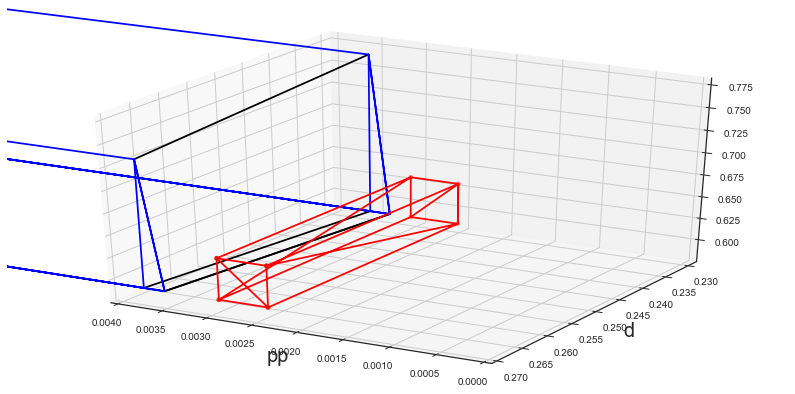

In [18]:
ic_solver.set_tolerance_parameters(k=.1, t=.05, m=.5) 
ic_solver.set_deviations(rho_p=.001, rho_m=.05)

print ic_solver.is_rationalizable(p_c, 'plot')
plt.xlim(0, .004)
plt.show()